In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
from sklearn.metrics import mean_squared_error as MSE

In [4]:
df = pd.read_csv("train.csv")
df

,Year,Month,Indicator,Value,Unit
0,2026,April,CO2 levels,405.67,PPM
1,2035,July,CO2 levels,423.20,PPM
2,2044,December,CO2 levels,445.10,PPM
3,2023,January,CO2 levels,396.04,PPM
4,2027,July,CO2 levels,406.57,PPM
...,...,...,...,...,...
749,2043,August,CO2 levels,439.02,PPM
750,2035,August,CO2 levels,420.46,PPM
751,2048,December,CO2 levels,455.69,PPM
752,2004,October,CO2 levels,361.59,PPM


In [5]:
df_test = pd.read_csv("test.csv")
df_test.index = df_test['Year']
df_test.drop('Year',axis=1,inplace=True)
df_test

,id,Month,Indicator,Unit
Year,,,,
2049,0,January,CO2 levels,PPM
2049,1,February,CO2 levels,PPM
2049,2,March,CO2 levels,PPM
2049,3,April,CO2 levels,PPM
2049,4,May,CO2 levels,PPM
2049,5,June,CO2 levels,PPM
2049,6,July,CO2 levels,PPM
2049,7,August,CO2 levels,PPM
2049,8,September,CO2 levels,PPM


In [6]:
df = df.sort_values(by='Year')
df

,Year,Month,Indicator,Value,Unit
200,1986,October,CO2 levels,343.67,PPM
713,1986,July,CO2 levels,347.45,PPM
169,1986,August,CO2 levels,346.42,PPM
507,1986,April,CO2 levels,349.20,PPM
71,1986,December,CO2 levels,346.14,PPM
...,...,...,...,...,...
361,2048,August,CO2 levels,454.06,PPM
693,2048,February,CO2 levels,455.77,PPM
349,2048,November,CO2 levels,454.43,PPM
256,2048,April,CO2 levels,458.10,PPM


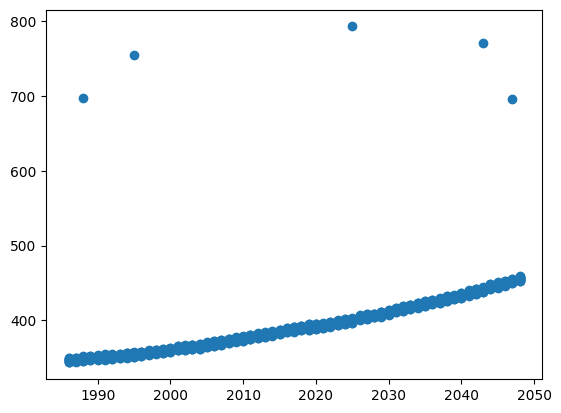

In [7]:
plt.scatter(df.Year,df['Value'])

In [8]:
index = df[df['Value']>600].index
index

Index([415, 582, 483, 739, 499], dtype='int64')

In [9]:
df.drop(index,axis=0,inplace=True)
df

,Year,Month,Indicator,Value,Unit
200,1986,October,CO2 levels,343.67,PPM
713,1986,July,CO2 levels,347.45,PPM
169,1986,August,CO2 levels,346.42,PPM
507,1986,April,CO2 levels,349.20,PPM
71,1986,December,CO2 levels,346.14,PPM
...,...,...,...,...,...
361,2048,August,CO2 levels,454.06,PPM
693,2048,February,CO2 levels,455.77,PPM
349,2048,November,CO2 levels,454.43,PPM
256,2048,April,CO2 levels,458.10,PPM


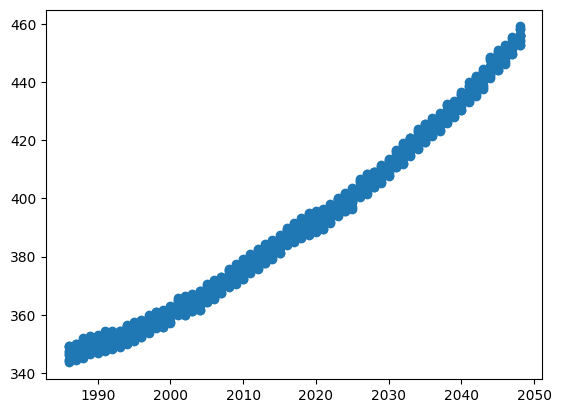

In [10]:
plt.scatter(df.Year,df['Value'])

In [11]:
df.index = df['Year']

In [12]:
df.drop(['Year'],axis=1,inplace=True)
df

,Month,Indicator,Value,Unit
Year,,,,
1986,October,CO2 levels,343.67,PPM
1986,July,CO2 levels,347.45,PPM
1986,August,CO2 levels,346.42,PPM
1986,April,CO2 levels,349.20,PPM
1986,December,CO2 levels,346.14,PPM
...,...,...,...,...
2048,August,CO2 levels,454.06,PPM
2048,February,CO2 levels,455.77,PPM
2048,November,CO2 levels,454.43,PPM


In [13]:
df=df.sort_values(by='Year')
df

,Month,Indicator,Value,Unit
Year,,,,
1986,October,CO2 levels,343.67,PPM
1986,July,CO2 levels,347.45,PPM
1986,August,CO2 levels,346.42,PPM
1986,April,CO2 levels,349.20,PPM
1986,December,CO2 levels,346.14,PPM
...,...,...,...,...
2048,January,CO2 levels,NaN,PPM
2048,October,CO2 levels,452.66,PPM
2048,December,CO2 levels,455.69,PPM


In [14]:
df.isnull().sum()

Month         0
Indicator     0
Value        18
Unit          0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
len(df)

731

In [17]:
Months = np.sort(df['Month'].unique())
Months

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [18]:
Month_wise_data=[]
for month in Months:
    Month_wise_data.append(df[df['Month']==month]['Value'])

In [19]:
Month_wise_data[0]

Year
1986    349.20
1987    349.49
1988    350.93
1989    351.43
1990    352.63
         ...  
2044    448.36
2045    450.14
2046    451.50
2047    454.89
2048    458.10
Name: Value, Length: 62, dtype: float64

In [20]:
Month_wise_data = dict([(month,data) for month,data in zip(Months,Month_wise_data)])
Month_wise_data

{'April': Year
 1986    349.20
 1987    349.49
 1988    350.93
 1989    351.43
 1990    352.63
          ...  
 2044    448.36
 2045    450.14
 2046    451.50
 2047    454.89
 2048    458.10
 Name: Value, Length: 62, dtype: float64,
 'August': Year
 1986    346.42
 1988    347.49
 1989    348.47
 1990    349.14
 1991    349.55
          ...  
 2044    442.70
 2045    445.85
 2046    447.88
 2047    451.20
 2048    454.06
 Name: Value, Length: 61, dtype: float64,
 'December': Year
 1986    346.14
 1987    347.14
 1989    348.71
 1990    349.47
 1991    350.19
 1992    350.58
 1993    351.36
 1994    353.13
 1995    354.16
 1996    355.18
 1997    356.53
 1998    357.64
 1999    358.61
 2000    360.31
 2001    361.50
 2002    362.54
 2003    363.86
 2005    366.96
 2006    368.40
 2007    370.49
 2008    372.12
 2009    373.90
 2010    374.86
 2011    377.52
 2012    379.50
 2013    380.73
 2014    382.24
 2015    384.21
 2016    386.78
 2017    388.20
 2018    389.85
 2019    390.73
 20

In [21]:
for each in Month_wise_data:
    print(len(Month_wise_data[each]))

62
61
60
59
59
62
62
63
61
59
62
61


In [22]:
MAX = 400
MAX

400

In [23]:
for each in Month_wise_data:
    Month_wise_data[each] = Month_wise_data[each]/MAX

In [24]:
Test=Month_wise_data['April']
Test

Year
1986    0.873000
1987    0.873725
1988    0.877325
1989    0.878575
1990    0.881575
          ...   
2044    1.120900
2045    1.125350
2046    1.128750
2047    1.137225
2048    1.145250
Name: Value, Length: 62, dtype: float64

In [25]:
def Create_data(series,lag):
    start = 0
    end = lag
    X = []
    Y = []
    while(end<len(series)):
        X.append(series[start:end])
        Y.append(series[end])
        start += 1
        end +=1
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(len(X),lag,1)
    return X,Y

In [26]:
window = 3

In [27]:
x_train,y_train = Create_data(Test.values[:50],window)
x_test,y_test = Create_data(Test.values[47:],window)

In [28]:
len(y_train) + len(y_test)

59

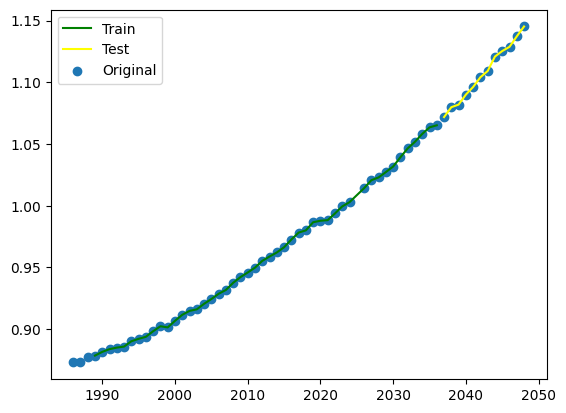

In [29]:
plt.plot(Test[3:50].index,y_train,color='green',label='Train')
plt.plot(Test[50:].index,y_test,color='yellow',label='Test')
plt.scatter(Test.index,Test,label='Original')
plt.legend()

In [30]:
del april_model

NameError: name 'april_model' is not defined

In [31]:
april_model = Sequential()
april_model.add(LSTM(128,input_shape=(window,1),activation='relu',return_sequences=False))
april_model.add(Dense(1,activation='linear'))

april_model.compile(optimizer=Adam(),loss='mean_squared_error')
april_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
epochs=0

In [71]:
epoch=10
april_model.fit(x_train,y_train,epochs=epoch,batch_size=1,validation_data=(x_test,y_test))
epochs += epoch

Epoch 1/10
47/47 [==============================] - 0s 5ms/step - loss: 4.1434e-05 - val_loss: 6.9954e-06
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 4.3874e-05 - val_loss: 1.0587e-04
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 1.6348e-05 - val_loss: 3.3617e-05
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 2.1820e-05 - val_loss: 2.5732e-05
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 3.2618e-05 - val_loss: 6.3695e-05
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 5.1666e-05 - val_loss: 1.9663e-05
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 4.0721e-05 - val_loss: 1.5512e-04
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 2.2015e-05 - val_loss: 1.2980e-04
Epoch 9/10
47/47 [==============================] - 0s 4ms/step - loss: 3.6226e-05 - val_loss: 9.0787e-05
Epoch 10/10
47/47 [===========================

In [72]:
epochs

130

In [73]:
y_pred = april_model.predict(x_test).reshape(-1,)

1/1 [==============================] - 0s 25ms/step


In [74]:
np.sqrt(MSE(y_test,y_pred))*MAX

1.0793908269141343

In [75]:
y_test

array([1.07185 , 1.07985 , 1.08195 , 1.09005 , 1.09625 , 1.10415 ,
       1.109175, 1.1209  , 1.12535 , 1.12875 , 1.137225, 1.14525 ])

In [76]:
y_pred

array([1.0715591, 1.0763959, 1.0814804, 1.0881549, 1.0948921, 1.1003051,
       1.1085373, 1.1157337, 1.124433 , 1.1323048, 1.1408223, 1.1464382],
      dtype=float32)

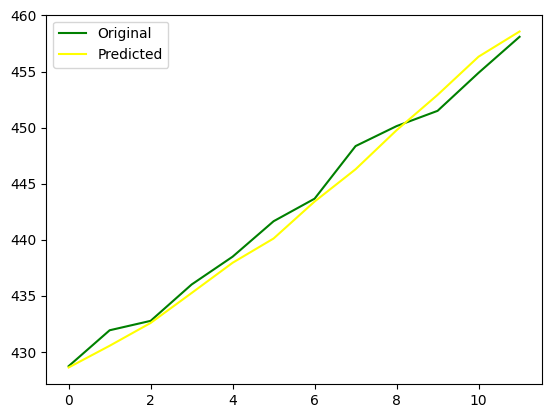

In [77]:
plt.plot(range(len(y_test)),y_test*MAX,color='green',label='Original')
plt.plot(range(len(y_pred)),y_pred*MAX,color='yellow',label='Predicted')
plt.legend()
plt.show()

In [78]:
pred=april_model.predict(x_train)
pred=np.mean(pred,axis=1).reshape(-1,)

2/2 [==============================] - 0s 4ms/step


In [79]:
np.sqrt(MSE(y_train,pred))*MAX

2.0056210407689243

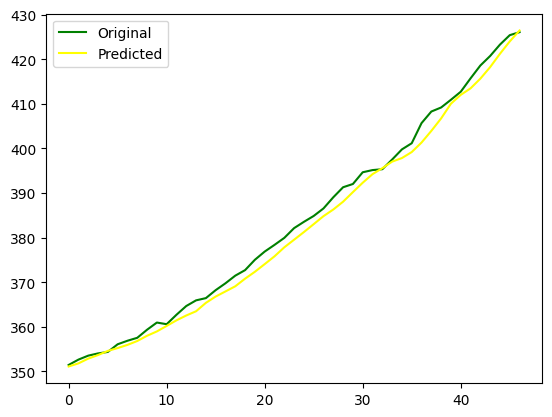

In [80]:
plt.plot(range(len(y_train)),y_train*MAX,color='green',label='Original')
plt.plot(range(len(pred)),pred*MAX,color='yellow',label='Predicted')
plt.legend()
plt.show()

In [43]:
class Predict:
    def __init__(self,window:int,prev_data:np.ndarray,model):
        self.__prev_data = list(prev_data)
        self.predictions = []
        self.__model = model
    def predict(self,num_prediction:int):
        del self.predictions
        self.predictions = []
        for _ in range(num_prediction):
            print(self.__prev_data)
            pred = self.__model.predict(np.array(self.__prev_data).reshape(1,window,1)).reshape(-1,)
            print(pred)
            self.predictions.append(pred[0])
            self.__prev_data.append(pred[0])
            self.__prev_data.pop(0)

In [95]:
prev_data = Test.values[-window:]
prev_data

array([1.12875 , 1.137225, 1.14525 ])

In [96]:
ob = Predict(window,prev_data=prev_data,model=april_model)

In [97]:
ob.predict(5)
ob.predictions

[1.12875, 1.137225, 1.14525]
1/1 [==============================] - 0s 23ms/step
[1.1532419]
[1.137225, 1.14525, 1.1532419]
1/1 [==============================] - 0s 27ms/step
[1.1625646]
[1.14525, 1.1532419, 1.1625646]
1/1 [==============================] - 0s 28ms/step
[1.1720135]
[1.1532419, 1.1625646, 1.1720135]
1/1 [==============================] - 0s 27ms/step
[1.182007]
[1.1625646, 1.1720135, 1.182007]
1/1 [==============================] - 0s 26ms/step
[1.192937]


[1.1532419, 1.1625646, 1.1720135, 1.182007, 1.192937]

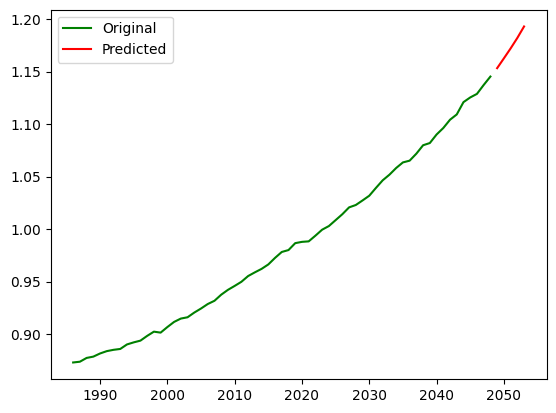

In [98]:
plt.plot(Test.index,Test,color='green',label='Original')
plt.plot(range(2049,2054),np.array(ob.predictions),color='red',label='Predicted')
plt.legend()

In [90]:
prev_data = Test.values[:window]
prev_data

array([0.873   , 0.873725, 0.877325])

In [91]:
ob = Predict(window,prev_data=prev_data,model=april_model)

In [92]:
ob.predict(20)

[0.873, 0.873725, 0.877325]
1/1 [==============================] - 0s 25ms/step
[0.8777219]
[0.873725, 0.877325, 0.8777219]
1/1 [==============================] - 0s 22ms/step
[0.87926716]
[0.877325, 0.8777219, 0.87926716]
1/1 [==============================] - 0s 29ms/step
[0.8813508]
[0.8777219, 0.87926716, 0.8813508]
1/1 [==============================] - 0s 29ms/step
[0.88247836]
[0.87926716, 0.8813508, 0.88247836]
1/1 [==============================] - 0s 29ms/step
[0.8840809]
[0.8813508, 0.88247836, 0.8840809]
1/1 [==============================] - 0s 25ms/step
[0.8857306]
[0.88247836, 0.8840809, 0.8857306]
1/1 [==============================] - 0s 27ms/step
[0.88711166]
[0.8840809, 0.8857306, 0.88711166]
1/1 [==============================] - 0s 25ms/step
[0.8886631]
[0.8857306, 0.88711166, 0.8886631]
1/1 [==============================] - 0s 31ms/step
[0.89019036]
[0.88711166, 0.8886631, 0.89019036]
1/1 [==============================] - 0s 31ms/step
[0.89164585]
[0.8886631, 0.

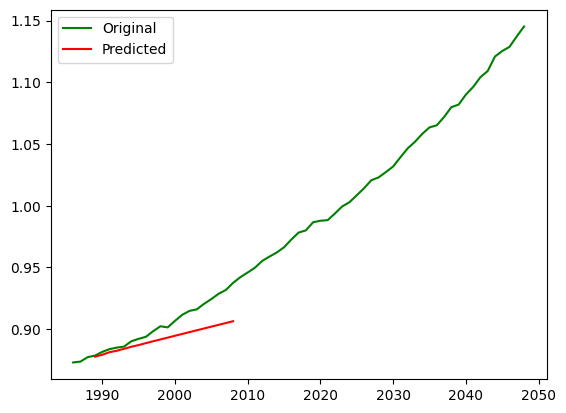

In [94]:
plt.plot(Test.index,Test,color='green',label='Original')
plt.plot(range(1989,2009),np.array(ob.predictions),color='red',label='Predicted')
plt.legend()

In [48]:
Test.index

Index([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048],
      dtype='int64', name='Year')

In [76]:
test = df.copy()
dic = dict([(each,i) for i,each in enumerate(df['Month'].unique())])
dic

{'October': 0,
 'July': 1,
 'August': 2,
 'April': 3,
 'December': 4,
 'June': 5,
 'September': 6,
 'May': 7,
 'March': 8,
 'November': 9,
 'February': 10,
 'January': 11}

In [77]:
test['Month'] = test['Month'].map(dic)
test

,Month,Indicator,Value,Unit
Year,,,,
1986,0,CO2 levels,343.67,PPM
1986,1,CO2 levels,347.45,PPM
1986,2,CO2 levels,346.42,PPM
1986,3,CO2 levels,349.20,PPM
1986,4,CO2 levels,346.14,PPM
...,...,...,...,...
2048,8,CO2 levels,456.21,PPM
2048,0,CO2 levels,452.66,PPM
2048,4,CO2 levels,455.69,PPM


In [80]:
test.index

Index([1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
       ...
       2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048],
      dtype='int64', name='Year', length=731)

In [81]:
test['n'] = test.index*100 + test.Month
test

,Month,Indicator,Value,Unit,n
Year,,,,,
1986,0,CO2 levels,343.67,PPM,198600
1986,1,CO2 levels,347.45,PPM,198601
1986,2,CO2 levels,346.42,PPM,198602
1986,3,CO2 levels,349.20,PPM,198603
1986,4,CO2 levels,346.14,PPM,198604
...,...,...,...,...,...
2048,8,CO2 levels,456.21,PPM,204808
2048,0,CO2 levels,452.66,PPM,204800
2048,4,CO2 levels,455.69,PPM,204804


In [82]:
test.index = test.n
test

,Month,Indicator,Value,Unit,n
n,,,,,
198600,0,CO2 levels,343.67,PPM,198600
198601,1,CO2 levels,347.45,PPM,198601
198602,2,CO2 levels,346.42,PPM,198602
198603,3,CO2 levels,349.20,PPM,198603
198604,4,CO2 levels,346.14,PPM,198604
...,...,...,...,...,...
204808,8,CO2 levels,456.21,PPM,204808
204800,0,CO2 levels,452.66,PPM,204800
204804,4,CO2 levels,455.69,PPM,204804


In [84]:
test.drop(['n'],axis=1,inplace=True)

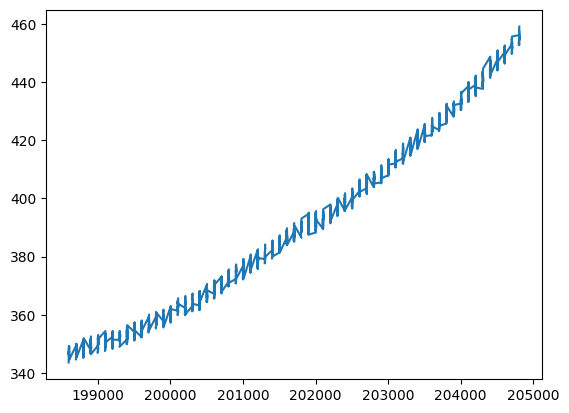

In [86]:
plt.plot(test.index,test.Value)